# ASTR 540 Homework 2 - Ansh Gupta

In [320]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table, join
import astropy.units as u
from astropy.coordinates import SkyCoord

from astroquery.gaia import Gaia
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"  # Reselect Data Release 3, default

# Problem 1

In [336]:
# List of Gaia IDs to from Carlin+2018
gaia_ids = np.genfromtxt('ids.txt', dtype='str')

In [337]:
# construct a query to retrieve data for the specified Gaia IDs
query = "SELECT * FROM gaiadr3.gaia_source WHERE source_id IN ({})".format(','.join(map(str, gaia_ids)))

# query Gaia database
job = Gaia.launch_job_async(query)
query_table = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


In [338]:
query_table

solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,

In [329]:
coord = SkyCoord(ra=209.489916, dec=26.46732 , unit=(u.degree, u.degree), frame='icrs')
r = Gaia.cone_search_async(coordinate=coord, radius=u.Quantity(1.0, u.arcsecond))

INFO: Query finished. [astroquery.utils.tap.core]


In [330]:
test = r.get_results()

In [331]:
test

solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,dist
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,,
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,fl

In [310]:
carlin_table = Table.read('carlin_table.txt', format='csv')
carlin_table['source_id'] = carlin_table['source_id'].astype(np.int64)
new_table = Table(carlin_table) # make a copy of the Carlin table

In [332]:
# carlin_table['source_id'][14] = 1450751617997778688

id,source_id,alpha,delta,g,r,i,v_helio,v_helio_err,mu_alpha*,mu_alpha*_err,mu_delta,mu_delta_err,[Fe/H],D,Member?
str14,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1
s135549+263008,1450811159128205568,208.955653,26.502208,21.01,20.67,20.45,195.5,11.4,1.078,3.305,5.259,3.285,-3.3,23.9,N
s135603+263942,1450817000283805824,209.013621,26.661679,20.4,19.95,19.78,204.0,8.5,-0.466,1.308,-0.583,1.047,-2.5,15.9,Y
s135630+265024,1450826552290908800,209.128453,26.840015,18.96,19.05,19.17,171.6,11.1,-1.211,0.562,-1.139,0.436,--,--,Y
s135638+265222,1450826724089602816,209.1596,26.872888,20.19,19.73,19.56,188.9,7.7,-1.84,0.844,-1.784,0.761,-2.3,8.8,Y
s135642+265847,1451038792395234560,209.174766,26.979976,18.94,19.05,19.17,180.4,10.9,-1.932,0.508,0.579,0.5,--,--,Y
s135702+264947,1450823051893369984,209.261163,26.829991,20.03,19.61,19.4,197.8,7.2,-1.709,0.767,-0.332,0.631,-2.7,3.5,Y
s135719+263424,1450803222028673280,209.331958,26.573608,19.1,19.3,19.5,220.8,12.3,-1.492,0.531,-0.928,0.48,--,--,Y
s135752+264815,1450833767836315392,209.467272,26.804392,18.99,19.16,19.35,209.3,11.5,-0.207,0.708,-0.927,0.735,--,--,Y
s135755+263953,1450828682594980736,209.479318,26.664838,20.16,19.71,19.52,185.7,7.7,-0.462,0.786,-0.479,0.673,-2.1,12.5,Y


In [312]:
# replace DR2 values in the Carlin table with DR3 data, if they exist
for row in new_table:
    # check for objects in the Carlin table that are in DR3
    match_row = query_table['source_id'] == row['source_id']
    if match_row.any():
        # for matching objects, update their info
        row['alpha'] = query_table[match_row]['ra']
        row['delta'] = query_table[match_row]['dec']
        row['mu_alpha*'] = query_table[match_row]['pmra']
        row['mu_alpha*_err'] = query_table[match_row]['pmra_error']
        row['mu_delta'] = query_table[match_row]['pmdec']
        row['mu_delta_err'] = query_table[match_row]['pmdec_error']

In [318]:
new_table.write('updated_carlin_table.tex', format='latex')

In [209]:
mask = np.where(np.isin(carlin_table['source_id'], query_table['source_id']))
# new_table

Average RA PM Error Reduction: 0.475


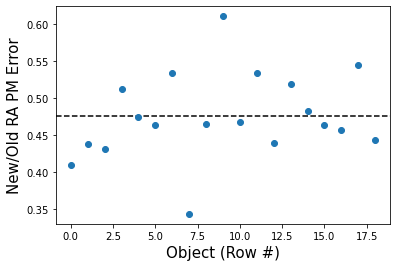

In [210]:
alpha_err_ratio = new_table['mu_alpha*_err'][mask]/carlin_table['mu_alpha*_err'][mask]
plt.plot(alpha_err_ratio, 'o')
plt.xlabel('Object (Row #)', fontsize=15)
plt.ylabel('New/Old RA PM Error', fontsize=15)
plt.axhline(np.mean(alpha_err_ratio), ls='--', c='k', zorder=-1)
print(f"Average RA PM Error Reduction: {np.mean(alpha_err_ratio):.3}")

Average RA PM Error Reduction: 0.409


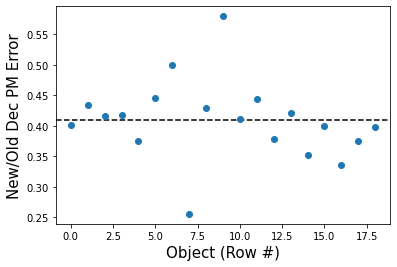

In [211]:
delta_err_ratio = new_table['mu_delta_err'][mask]/carlin_table['mu_delta_err'][mask]
plt.plot(delta_err_ratio, 'o')
plt.xlabel('Object (Row #)', fontsize=15)
plt.ylabel('New/Old Dec PM Error', fontsize=15)
plt.axhline(np.mean(delta_err_ratio), ls='--', c='k', zorder=-1)
print(f"Average RA PM Error Reduction: {np.mean(delta_err_ratio):.3}")

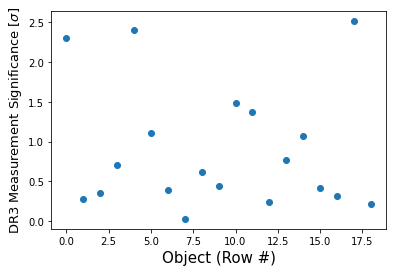

In [225]:
delta_diff = (carlin_table['mu_delta'][mask]-new_table['mu_delta'][mask])
delta_combined_err = np.hypot(carlin_table['mu_delta_err'][mask], new_table['mu_delta_err'][mask])
delta_significance = np.abs(delta_diff/delta_combined_err)
plt.plot(delta_significance, 'o')
plt.xlabel('Object (Row #)', fontsize=15)
plt.ylabel(r'DR3 Measurement Significance [$\sigma$]', fontsize=13);

There are no DR3 measurements that are $>3 \sigma$ away from the originally measured values

In [226]:
bootes_members = new_table[new_table['Member?'] == 'Y']
# bootes_members

In [232]:
bootes_dec = bootes_members['delta'] * np.pi/180

bootes_mu_alpha = bootes_members['mu_alpha*']
bootes_mu_alpha_err = bootes_members['mu_alpha*_err']
bootes_mu_delta = bootes_members['mu_delta']
bootes_mu_delta_err = bootes_members['mu_delta_err']

In [297]:
alpha_weights = 1 / (bootes_mu_alpha_err ** 2) * np.cos(bootes_dec)
error_weighted_alpha_mean = np.sum(bootes_mu_alpha * alpha_weights) / np.sum(alpha_weights)
alpha_mean_error = np.sqrt(1 / np.sum(alpha_weights))
delta_weights = 1 / (bootes_mu_delta_err ** 2)
error_weighted_delta_mean = np.sum(bootes_mu_delta * delta_weights) / np.sum(delta_weights)
delta_mean_error = np.sqrt(1 / np.sum(delta_weights))
# error_weighted_PM = np.hypot(error_weighted_alpha_mean, error_weighted_delta_mean)

print(f"Error-weighted Mean RA Proper Motion: {error_weighted_alpha_mean:.3} ± {alpha_mean_error:.1} mas/year")
print(f"Error-weighted Mean Dec Proper Motion: {error_weighted_delta_mean:.3} ± {delta_mean_error:.1} mas/year")

Error-weighted Mean RA Proper Motion: -1.16 ± 0.08 mas/year
Error-weighted Mean Dec Proper Motion: -1.04 ± 0.06 mas/year


Text(0, 0.5, '$\\mu_{\\delta}$ (mas/yr)')

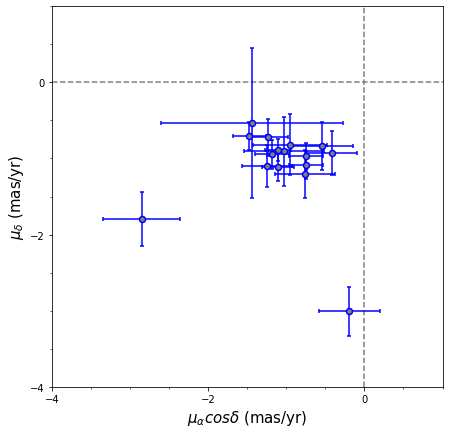

In [343]:
plt.figure(figsize=(7, 7))
plt.errorbar(bootes_mu_alpha*np.cos(bootes_dec), bootes_mu_delta, \
             xerr=bootes_mu_alpha_err*np.cos(bootes_dec), yerr=bootes_mu_delta_err, fmt='o',
            markerfacecolor='grey', markeredgecolor='blue', color='blue', capsize=2, lw=1.5,
            markeredgewidth=1.5)
plt.axhline(0, ls='--', c='grey', zorder=-1)
plt.axvline(0, ls='--', c='grey', zorder=-1)

plt.xlim(-4, 1)
plt.ylim(-4, 1)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.xlabel(r'$\mu_{\alpha} cos\delta$ (mas/yr)', fontsize=15)
plt.ylabel(r'$\mu_{\delta}$ (mas/yr)', fontsize=15)

In [374]:
# coordinates for BootesIII center from Grillmair+2009
boo_center_ra = 209.281
boo_center_dec = 26.775

# Problem 2

In [340]:
dwarf_table = Table.read('rrl.dat', format='ascii')

In [341]:
dwarf_table

Name,RA(deg),DEC(deg),Period(d),i_mag,z_mag,A_i,A_z
str4,float64,float64,float64,float64,float64,float64,float64
RRL1,189.570323,-40.939879,0.3899181,20.92,20.86,0.192,0.146
RRL2,189.633635,-40.878072,0.4224812,20.88,20.83,0.203,0.155
RRL3,189.584351,-41.101214,0.7358982,20.67,20.59,0.177,0.135


In [355]:
m_i = dwarf_table['i_mag']
m_z = dwarf_table['z_mag']
P = dwarf_table['Period(d)']
Z = 0.0001
A_i = dwarf_table['A_i']
A_z = dwarf_table['A_z']

m_i_err = 0.03
m_z_err = 0.03
P_err = 0.01
Z_err = Z*0.1

In [356]:
M_i = 0.908- 1.035*np.log10(P) + 0.220*np.log10(Z)
M_z = 0.839 - 1.295*np.log10(P) + 0.211*np.log10(Z)
M_i_err = (1.035/P)*P_err + (0.220/Z)*Z_err
M_z_err = (1.295/P)*P_err + (0.211/Z)*Z_err

In [363]:
distmod_i = m_i - M_i
distmod_z = m_z - M_z
distmod_i_err = np.hypot(m_i_err, M_i_err)
distmod_z_err = np.hypot(m_z_err, M_z_err)

d_i = 10**((distmod_i + 5 - A_i)/5)
d_z = 10**((distmod_z + 5 - A_z)/5)
d_i_err = np.log(10)*d_i*distmod_i_err/5
d_z_err = np.log(10)*d_z*distmod_z_err/5

      i_mag       
------------------
113587.74894660102
112808.57917682393
116260.25530266637


In [373]:
d_combined = np.mean((d_i, d_z), axis=None)
d_combined_err = np.sqrt(np.sum((d_i_err**2, d_z_err**2), axis=None))
print(f'Inferred distane to dwarf galaxy: {d_combined/1000:.4} ± {d_combined_err/1000:.2} kpc')

Inferred distane to dwarf galaxy: 112.6 ± 7.0 kpc
